In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 



In [3]:
# import data 

df = sns.load_dataset("titanic")

In [4]:
# composition 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [7]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [8]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [9]:
df["survived"].unique()

array([0, 1])

In [10]:
# find out the number of zeros and 1s in survived
df["survived"].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [11]:
df["pclass"].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [12]:
df["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [13]:
df["who"].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [14]:
df["adult_male"].value_counts()

adult_male
True     537
False    354
Name: count, dtype: int64

In [15]:
df["age"].value_counts()

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [16]:
# Dividing the age column into 3 categories using binning ?

max(df["age"])

80.0

In [17]:
bins = [0,5,12,18,40,80]

labels = ["0-5","6-12","13-18","19-40","41-80"]

#add new col 

df["age_groups"] =  pd.cut(df["age"],bins = bins, labels = labels)

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_groups
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,19-40
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,19-40
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,19-40
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,19-40
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,19-40


In [18]:
df["age_groups"].value_counts()

age_groups
19-40    425
41-80    150
13-18     70
0-5       44
6-12      25
Name: count, dtype: int64

In [19]:
# now to group this thing by sex (how much male and female )

df.groupby("sex")["age_groups"].value_counts().unstack()

age_groups,0-5,6-12,13-18,19-40,41-80
sex,,,,,
female,21,11,36,145,48
male,23,14,34,280,102


In [20]:
# now to group this thing by sex (how much male and female )

df.groupby("who")["age_groups"].value_counts().unstack()

age_groups,0-5,6-12,13-18,19-40,41-80
who,,,,,
child,44,25,14,0,0
man,0,0,31,280,102
woman,0,0,25,145,48


In [21]:
# find the max age where who is child 

df[df["who"] == "child"]["age"].max()




# means we have to update our bins 

15.0

In [22]:
# create bin edges
bins = [0,5,10,15,18,40,80]
lables = ['0-5', '6-10', "11-15", "16-18", "18-40", "41-80"]
2
# add new column
df ["age_groups"] = pd.cut(df["age"], bins=bins, labels=lables)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_groups
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,18-40
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,18-40
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,18-40
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,18-40
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,18-40


In [23]:

df.groupby("who")["age_groups"].value_counts().unstack()

age_groups,0-5,6-10,11-15,16-18,18-40,41-80
who,,,,,,
child,44,20,19,0,0,0
man,0,0,0,31,280,102
woman,0,0,0,25,145,48


In [24]:
# childs on the basis of there class 

df.groupby("who")[["age_groups", "class"]].value_counts().unstack()

class             First  Second  Third
who   age_groups                      
child 0-5             3      13     28
      6-10            0       4     16
      11-15           3       2     14
      16-18           0       0      0
      18-40           0       0      0
      41-80           0       0      0
man   0-5             0       0      0
      6-10            0       0      0
      11-15           0       0      0
      16-18           2       6     23
      18-40          46      63    171
      41-80          50      21     31
woman 0-5             0       0      0
      6-10            0       0      0
      11-15           0       0      0
      16-18           8       4     13
      18-40          48      47     50
      41-80          26      13      9

In [25]:
# how much people survived in each class 

df.groupby("who")[["survived", "class"]].value_counts().unstack()

class           First  Second  Third
who   survived                      
child 0             1       0     33
      1             5      19     25
man   0            77      91    281
      1            42       8     38
woman 0             2       6     58
      1            89      60     56

<Axes: xlabel='age', ylabel='fare'>

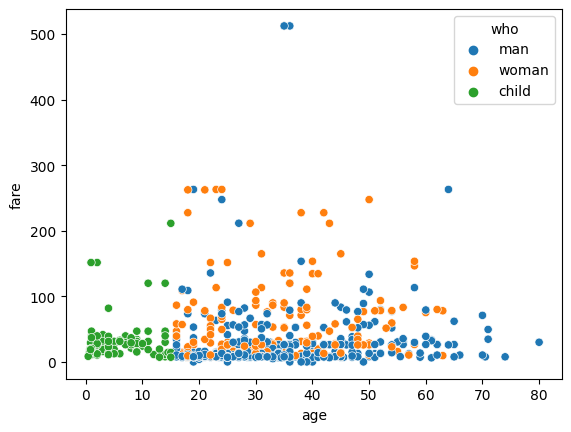

In [28]:
# visualization 

sns.scatterplot(data=df, x="age",y="fare", hue="who")

#scatter plot is between two numerical 

<Axes: xlabel='age', ylabel='fare'>

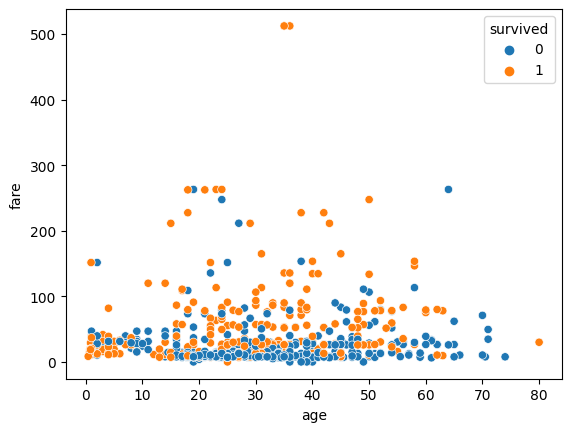

In [29]:
# visualization 

sns.scatterplot(data=df, x="age",y="fare", hue="survived")

#scatter plot is between two numerical 

<Axes: xlabel='who', ylabel='fare'>

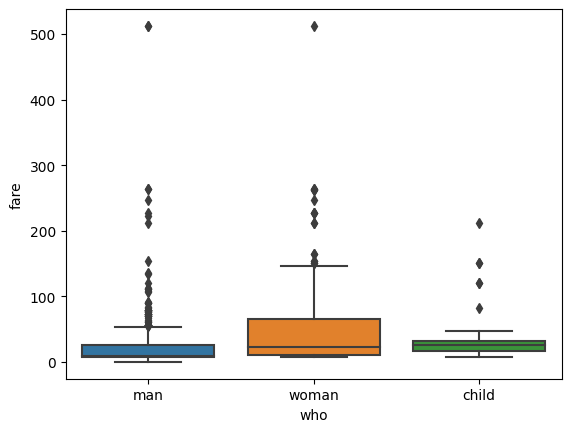

In [27]:
# visualization 

sns.boxplot(data=df, x="who",y="fare")

# prefer to add categorical/qualitative values on x axis 

In [31]:
import plotly.express as px

In [34]:
fig = px.scatter(df, x="age",y="fare",color="sex")

fig.show()

In [35]:
fig = px.box(df, x="survived",y="fare",color="who")

fig.show()

<Axes: xlabel='age_groups', ylabel='count'>

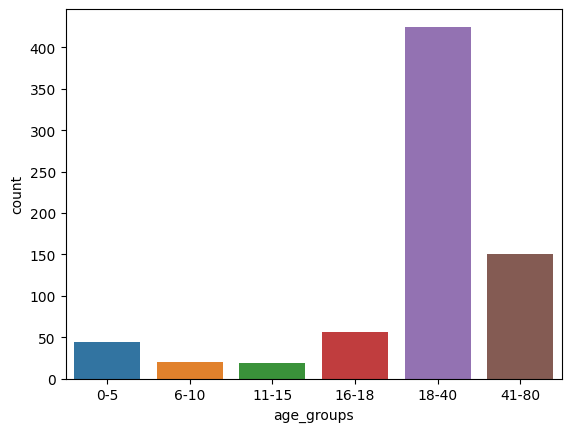

In [37]:
sns.countplot(df, x="age_groups")

<Axes: xlabel='age', ylabel='Count'>

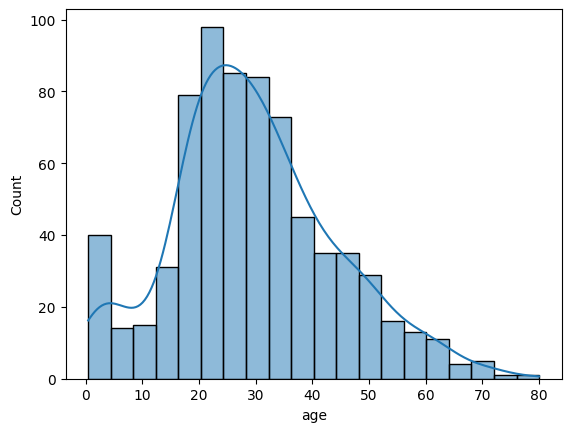

In [41]:
# distribution

# normal distribution

sns.histplot(df, x="age", kde=True)

<Axes: xlabel='fare', ylabel='Count'>

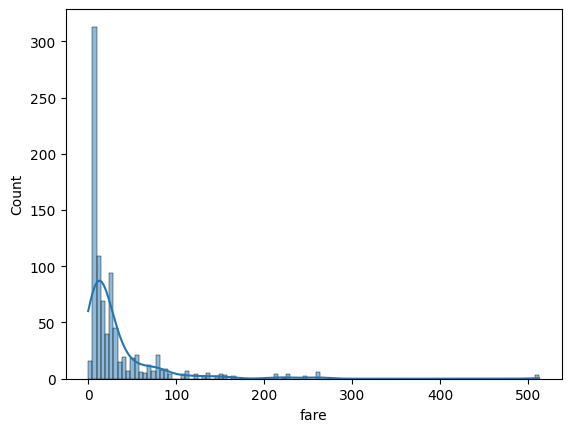

In [40]:
sns.histplot(df, x="fare", kde=True)

In [43]:
import numpy as np
from scipy.stats import shapiro

def check_normal_distribution(data):
    stat, p_value = shapiro(data)
    
    if p_value > 0.05:
        print("The data appears to be normally distributed (p-value =", p_value, ")")
    else:
        print("The data does not appear to be normally distributed (p-value =", p_value, ")")

# Replace this with your dataset
data = np.random.normal(0, 1, 1000)  # Example: 1000 samples from a standard normal distribution

check_normal_distribution(df["fare"])


The data does not appear to be normally distributed (p-value = 1.0789998175301091e-43 )


/home/talha/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



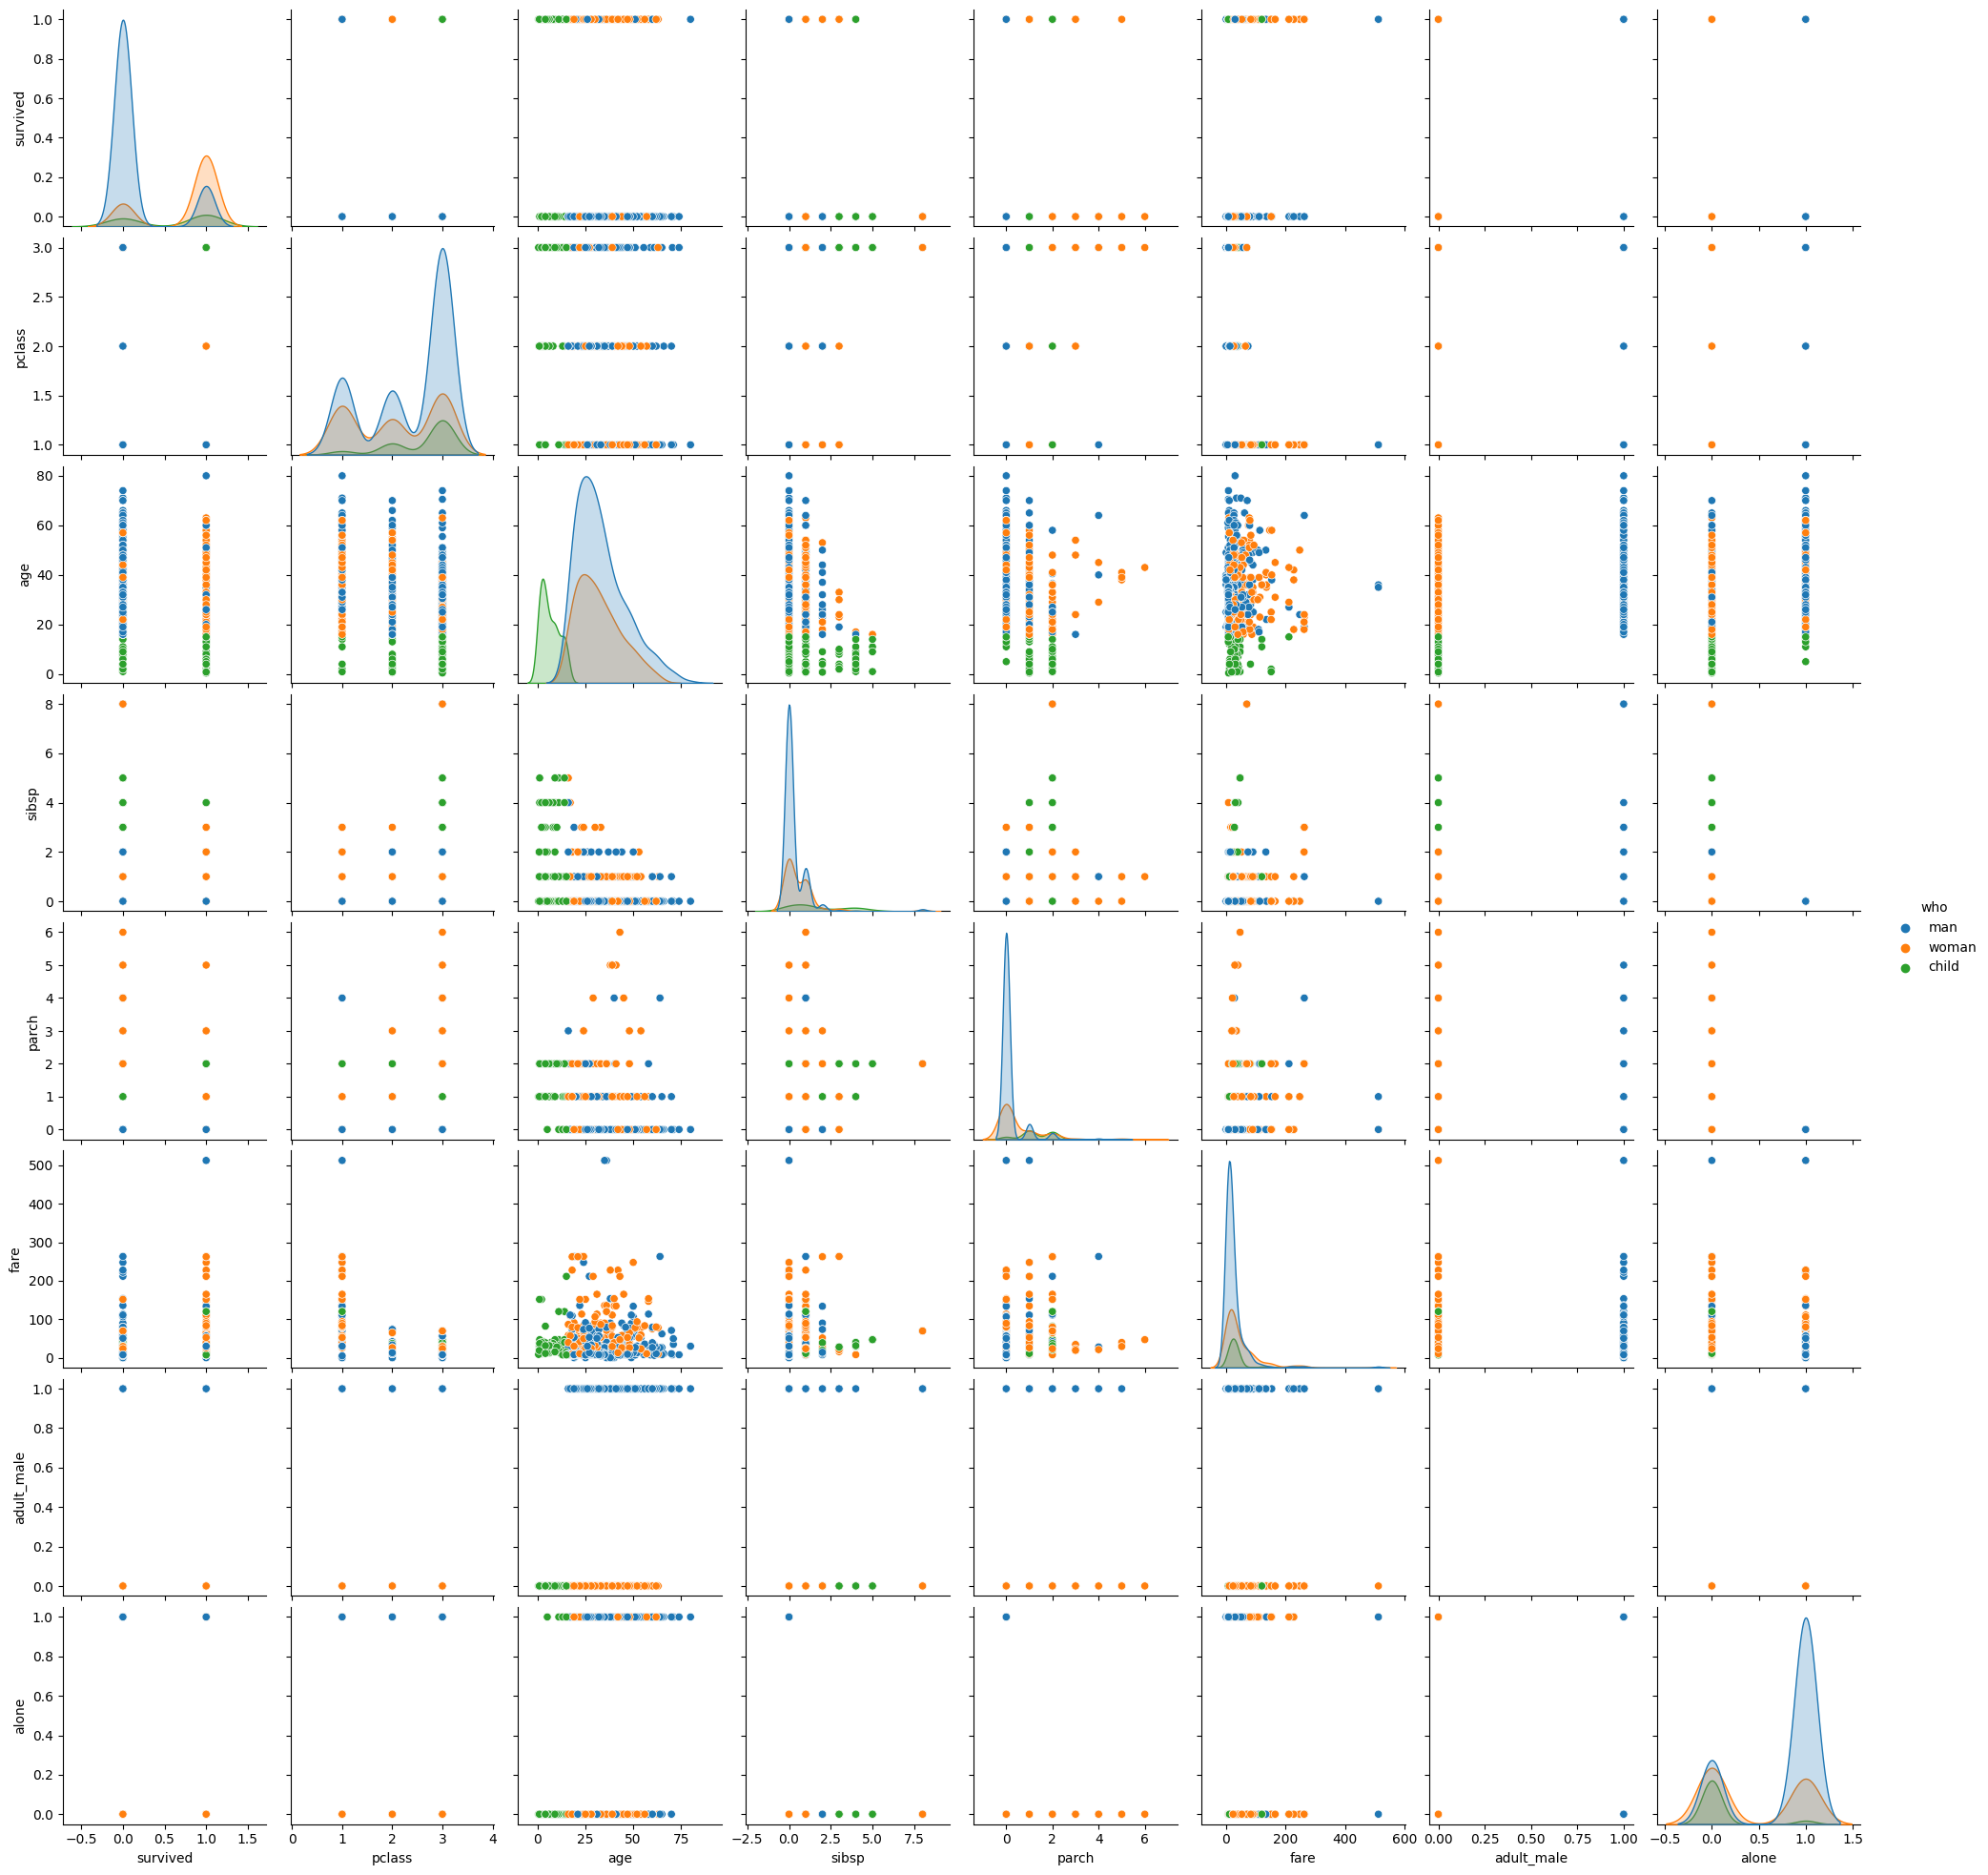

In [45]:
# uni / multi- varient analysis

sns.pairplot(df, hue="who")

In [48]:
# correlation matric

corr = df[["age","fare"]].corr()

corr

# sns.heatmap(corr)

,age,fare
age,1.000000,0.096067
fare,0.096067,1.000000
